In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree
from dtreeviz.trees import *

In [2]:
iris = load_iris()

iris_ds = pd.read_csv('iris.data')

In [3]:
X = pd.DataFrame(iris.data, columns= iris.feature_names)

In [4]:
y = pd.Series(iris.target)

from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

iris_ds.shape

In [ ]:
iris_ds.info

## Splitting train and test 

In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

y_train.reshape(1, -1)

X_test.reshape(1, -1)

y_test.reshape(1, -1)

print(y_train)

### feature scaling - Used for scaling large data into small 

#not needed in iris dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

## Training RF on training set 

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
help(RandomForestClassifier)


Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [9]:

classifier = RandomForestClassifier(n_estimators=4, criterion="entropy", random_state=10) 
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=4, random_state=10)

### Predicting a new result 

In [18]:
y_pred = classifier.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)

In [23]:
accuracy

1.0

In [24]:
classification_report = classification_report(y_test, y_pred)

In [25]:
classification_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      1.00      1.00         6\n           2       1.00      1.00      1.00         3\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.00        15\nweighted avg       1.00      1.00      1.00        15\n'

In [26]:
import graphviz
from sklearn.tree import export_graphviz
import pydotplus

In [32]:
tree = classifier.estimators_[1]

In [33]:
dot_data = export_graphviz(tree, out_file=None,
                           feature_names= iris.feature_names,
                           class_names= iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

In [34]:
graph = pydotplus.graph_from_dot_data(dot_data)

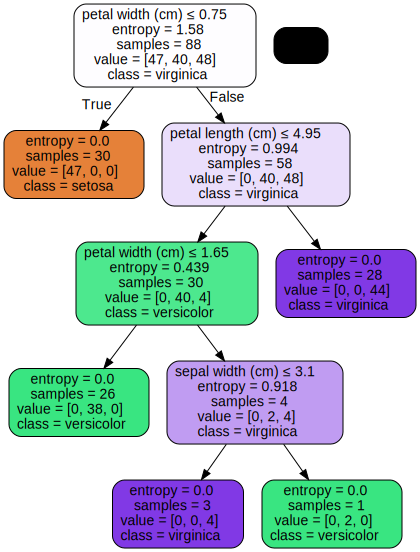

In [35]:
graphviz.Source(graph.to_string())
